###
451102.3619581766
(569, 2)
###
136982.60084059526
###
83134.02052601831
###
51364.74807026309
###
36090.04553314967
###
29134.3238773091
###
23316.512303713924
###
19649.88648504066
###
16773.550600959006
[451102.3619581766, 136982.6008405955, 83134.0205260184, 51364.74807026326, 36090.04553314958, 29134.32387730909, 23316.512303713902, 19649.886485040704, 16773.550600959068]
Cluster Size
(438, 4)
Cluster Size
(131, 4)


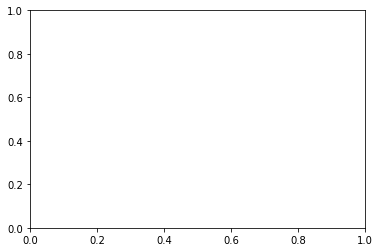

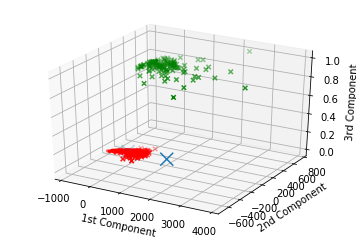

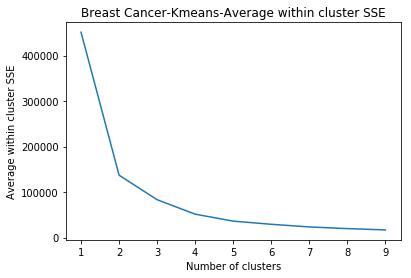

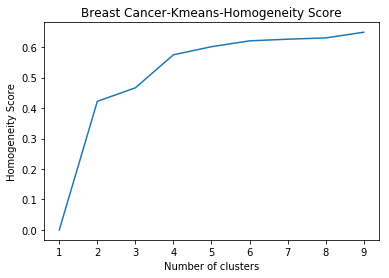

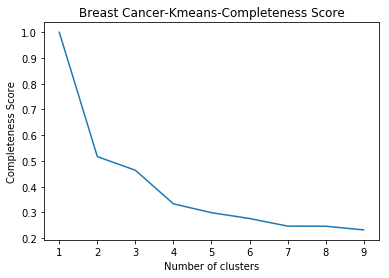

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn import metrics, decomposition
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from sklearn import datasets


class KMeansTestCluster():
    def __init__(self, X, y, clusters, plot=True, targetcluster=3, stats=False):
        self.X = X
        self.y = y
        self.clusters = clusters
        self.gen_plot = plot
        self.targetcluster = targetcluster
        self.stats = stats

    def run(self):
        meandist=[]
        homogeneity_scores=[]
        completeness_scores=[]
        v_measure = []
        rand_scores=[]
        silhouettes=[]

        for k in self.clusters:
            model = KMeans(n_clusters=k, max_iter=500, init='k-means++')
            labels = model.fit_predict(self.X)
            if k == self.targetcluster and self.stats:
                #print labels
                nd_data = np.concatenate((self.X, np.expand_dims(labels, axis=1),np.expand_dims(self.y, axis=1)), axis=1)
                pd_data = pd.DataFrame(nd_data)
                pd_data.to_csv("cluster_kmeans.csv", index=False, index_label=False, header=False)
                print(cdist(self.X, model.cluster_centers_, 'euclidean').shape)

            
            min = np.min(np.square(cdist(self.X, model.cluster_centers_, 'euclidean')), axis = 1)
            print ("###")
            print(-model.score(self.X)/self.X.shape[0])
            #print min
            value = np.mean(min)
            meandist.append(value)

            homogeneity_scores.append(metrics.homogeneity_score(self.y, labels))
            completeness_scores.append(metrics.completeness_score(self.y, labels))
            rand_scores.append(metrics.adjusted_rand_score(self.y, labels))
        print(meandist)
        if self.gen_plot:
            self.visualize()

            self.plot(meandist, homogeneity_scores, completeness_scores, rand_scores, silhouettes)

    def visualize(self):
        """
        Generate scatter plot of Kmeans with Centroids shown
        """
        fig = plt.figure(1)
        plt.clf()
        plt.cla()

        X_new = decomposition.pca.PCA(n_components=2).fit_transform(self.X)
        model = KMeans(n_clusters=self.targetcluster, max_iter=5000, init='k-means++')
        labels = model.fit_predict(X_new)
        totz = np.concatenate((X_new,  np.expand_dims(labels, axis=1), np.expand_dims(self.y, axis=1),), axis=1)

        # for each cluster
        colors = ['red', 'green']
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        for clust in range(0, self.targetcluster):
            totz_clust = totz[totz[:,-2] == clust]
            print("Cluster Size")
            print(totz_clust.shape)

            benign = totz_clust[totz_clust[:,-1] == 1]
            malignant = totz_clust[totz_clust[:,-1] == 0]

            ax.scatter(benign[:, 0], benign[:, 1], benign[:, 2], color=colors[clust], marker=".")
            ax.scatter(malignant[:, 0], malignant[:, 1], malignant[:, 2], color=colors[clust], marker="x")

        centroids = model.cluster_centers_
        ax.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=2)
            

        # ax.title("Breast Cancer Clustering")
        ax.set_xlabel("1st Component")
        ax.set_ylabel("2nd Component")
        ax.set_zlabel("3rd Component")
        plt.show()

    def plot(self, meandist, homogeneity, completeness, rand, silhouettes):
            """
            Plot average distance from observations from the cluster centroid
            to use the Elbow Method to identify number of clusters to choose
            """
            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, meandist)
            plt.xlabel('Number of clusters')
            plt.ylabel('Average within cluster SSE')
            plt.title('Breast Cancer-Kmeans-Average within cluster SSE')
            plt.show()


            """
            Plot homogeneity from observations from the cluster centroid
            to use the Elbow Method to identify number of clusters to choose
            """
            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, homogeneity)
            plt.xlabel('Number of clusters')
            plt.ylabel('Homogeneity Score')
            plt.title('Breast Cancer-Kmeans-Homogeneity Score')
            plt.show()


            """
            Plot completeness from observations from the cluster centroid
            to use the Elbow Method to identify number of clusters to choose
            """
            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, completeness)
            plt.xlabel('Number of clusters')
            plt.ylabel('Completeness Score')
            plt.title('Breast Cancer-Kmeans-Completeness Score')
            plt.show()

breast_cancer = datasets.load_breast_cancer()
#print breast_cancer
X, y = breast_cancer.data, breast_cancer.target
#print X
tester = KMeansTestCluster(X, y, clusters=range(1,10), plot=True, targetcluster=2, stats=True)
tester.run()